In [ ]:
### 단순선형회귀

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/content/drive/My Drive/데이터수집/2010년/2010년.csv',index_col=0)
data.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,7540,7820,7480,7520,177197,-0.007916
2010-01-05,7490,7580,7350,7500,214314,-0.002660
2010-01-06,7500,7500,7320,7350,81874,-0.020000
2010-01-07,7350,7420,7200,7210,106474,-0.019048
2010-01-08,7220,7330,7220,7240,61393,0.004161


In [ ]:
data.drop(['Change'],axis=1,inplace=False)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,7540,7820,7480,7520,177197
2010-01-05,7490,7580,7350,7500,214314
2010-01-06,7500,7500,7320,7350,81874
2010-01-07,7350,7420,7200,7210,106474
2010-01-08,7220,7330,7220,7240,61393
...,...,...,...,...,...
2010-12-24,5120,5120,4990,5070,87767
2010-12-27,5080,5120,5020,5050,49362
2010-12-28,5030,5140,5030,5110,80644


In [ ]:
y_target = data['Close']
X_data = data.drop(['Close','Change'],axis=1)

In [ ]:
X_data

,Open,High,Low,Volume
Date,,,,
2010-01-04,7540,7820,7480,177197
2010-01-05,7490,7580,7350,214314
2010-01-06,7500,7500,7320,81874
2010-01-07,7350,7420,7200,106474
2010-01-08,7220,7330,7220,61393
...,...,...,...,...
2010-12-24,5120,5120,4990,87767
2010-12-27,5080,5120,5020,49362
2010-12-28,5030,5140,5030,80644


In [ ]:
X_train,X_test,y_train,y_test =\
train_test_split(
    X_data # 테스트
    ,y_target # 답
    ,test_size=0.8 # 테스트 사이즈
    ,shuffle=False 
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

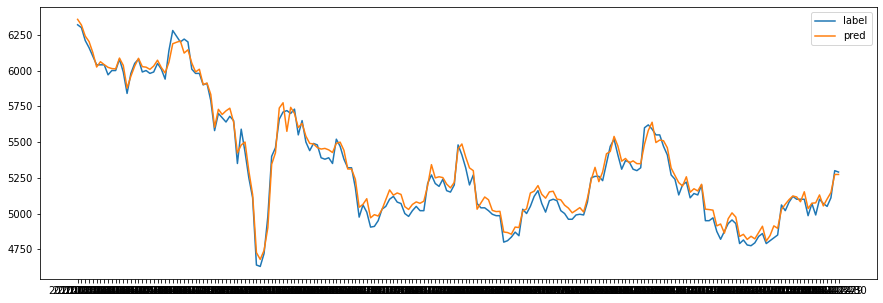

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_test,label='label')
plt.plot(y_preds,label='pred')
plt.legend()
plt.show()

In [ ]:
# RMSE
from sklearn.model_selection import cross_val_score

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores [-2382.07 -1836.43 -1674.02 -1527.57 -1161.77]
5 folds의 개별 RMSE scores [48.81 42.85 40.91 39.08 34.08]
5 folds의 평균 RMSE : 41.149


In [ ]:
### 릿지회귀

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
# alpha=10
ridge = Ridge(alpha=10)
neg_mse_scores_ = cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores_ = np.sqrt(-1*neg_mse_scores_)
avg_rmse_ = np.mean(rmse_scores_)

print('5 folds의 개별 Negative MSE scores',np.round(neg_mse_scores_,2))
print('5 folds의 개별 RMSE scores',np.round(rmse_scores_,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse_))

5 folds의 개별 Negative MSE scores [-2382.08 -1836.45 -1674.   -1527.56 -1161.77]
5 folds의 개별 RMSE scores [48.81 42.85 40.91 39.08 34.08]
5 folds의 평균 RMSE : 41.149


In [ ]:
### 라쏘회귀

In [ ]:
from sklearn.linear_model import Lasso,ElasticNet

In [ ]:
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True):
  coeff_df = pd.DataFrame()
  if verbose : print('####',model_name,'####')
  for param in params:
    if model_name == 'Ridge':model =Ridge(alpha=param)
    elif model_name == 'Lasso':model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param,l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model,X_data_n,y_target_n,scoring='neg_mean_squared_error',cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param,avg_rmse))
    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data,y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=model.coef_,index=X_data.columns)
    colname = 'alpha:'+str(param)
    coeff_df[colname] = coeff
  return coeff_df

In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data,y_target_n=y_target)

#### Lasso ####
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 41.191 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 41.191 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 41.191 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 41.190 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 41.187 


In [ ]:
# 엘라스틱넷 회귀

In [ ]:
elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params=elastic_alphas,X_data_n=X_data,y_target_n=y_target)

#### ElasticNet ####
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 41.191 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 41.191 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 41.190 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 41.190 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 41.187 


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# 표준 정규 분포 변환,최댓값/최솟값 정규화, 로그변환 함수
def get_scaled_data(method='None',p_degree=None,input_data=None):
  if method =='Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(
        degree = p_degree
        ,include_bias = False
    ).fit_transform(scaled_data)

  return scaled_data


In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1,1,10,100]

scale_methods = [
                 (None,None),('Standard',None),('Standard',2)
                 ,('MinMax',None),('MinMax',2),('Log',None)
]

for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(
      method=scale_method[0]
      ,p_degree=scale_method[1]
      ,input_data = X_data
  )
  print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0],scale_method[1]))
  get_linear_reg_eval('Ridge',params=alphas,X_data_n=X_data_scaled,y_target_n=y_target,verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 41.149 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 41.149 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 41.149 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 41.148 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 41.277 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 47.349 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 62.859 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 134.217 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 51.158 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 50.263 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 62.409 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 196.163 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 54.190 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 74.129 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 229.773 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 531.184 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 69.450 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 110.220 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 171.557 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 458.628 

## 변환 유형:Log, Polynomial D

In [ ]:
### 로지스틱 회귀

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [ ]:
# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_data)

X_train,X_test,y_train,y_test = \
train_test_split(
    data_scaled
    ,y_target
    ,test_size=0.8 # 테스트 사이즈
    ,shuffle=False 
)

In [ ]:
# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)

In [ ]:
# 정확도와 roc_auc 측정
print('accuracy : {0:.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc : {0:.3f}'.format(roc_auc_score(y_test,lr_preds)))

accuracy : 0.000


ValueError: ignored

In [ ]:
### 회귀트리

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# RandomForestRegressor
rf = RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores = cross_val_score(rf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores : ',np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores : ',np.round(rmse_scores,2))
print('5 교차 검증의 평균 MSE : {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores :  [-173876.09   -4628.1    -4530.9    -1648.03   -2447.74]
5 교차 검증의 개별 RMSE scores :  [416.98  68.03  67.31  40.6   49.47]
5 교차 검증의 평균 MSE : 128.479


In [ ]:
# 교차검증 평균 RMSE
def get_model_cv_predict(model,X_data,y_target):
  neg_mse_scores = cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)

  print('####',model.__class__.__name__,'####')
  print('5교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg = RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
  get_model_cv_predict(model,X_data,y_target)

#### DecisionTreeRegressor ####
5교차 검증의 평균 RMSE : 151.506
#### RandomForestRegressor ####
5교차 검증의 평균 RMSE : 128.479
#### GradientBoostingRegressor ####
5교차 검증의 평균 RMSE : 131.864
[03:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#### XGBRegressor ####
5교차 검증의 평균 RMSE : 128.011
#### LGBMRegressor ####
5교차 검증의 평균 RMSE : 196.965


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# log1p()로 RMSLE 계산
def rmsle(y,pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred) **2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

In [ ]:
# RMSE 계산
def rmse(y,pred):
  return np.sqrt(mean_squared_error(y,pred))

In [ ]:
# MSE,RMSE,RMSLE 모두 계산
def evaluate_regr(y,pred):
  rmsle_val = rmsle(y,pred)
  rmse_val=rmse(y,pred)
  mae_val = mean_absolute_error(y,pred)
  print('RMSLE: {0:.3f},RMSE : {1:.3f},MAE : {2:.3f}'.format(rmsle_val,rmse_val,mae_val))

In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 0.010,RMSE : 50.611,MAE : 43.260


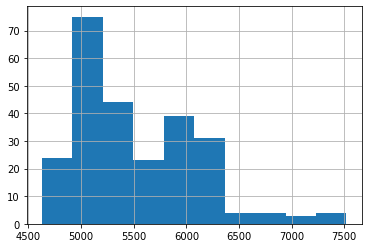

In [ ]:
y_target.hist()

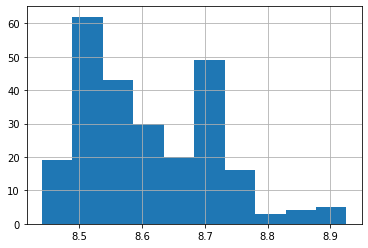

In [ ]:
# 로그 적용
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [ ]:
# 타깃 컬럼 close log1p로 로그변환
y_target_log = np.log1p(y_target)

# 학습/테스트 분리
X_train,X_test,y_train,y_test =\
train_test_split(
    X_data
    ,y_target_log
    ,test_size=0.8
    ,shuffle=False
)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)

pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp,pred_exp)

RMSLE: 0.029,RMSE : 149.594,MAE : 130.467


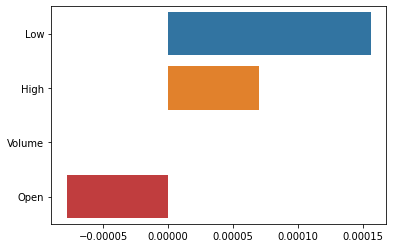

In [ ]:
coef =pd.Series(lr_reg.coef_,index=X_data.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)